<IPython.core.display.Javascript object>


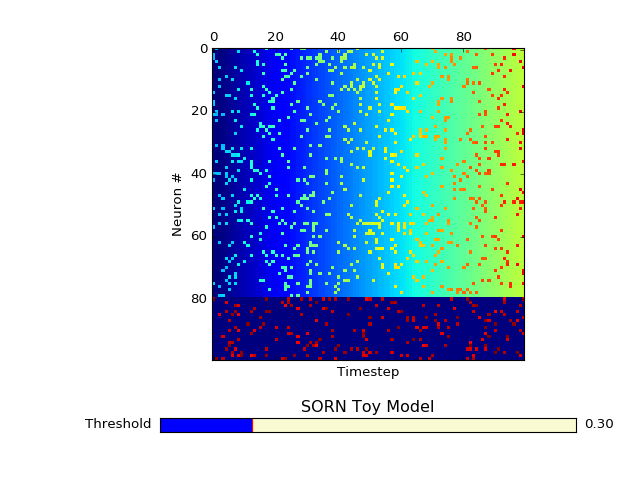

In [26]:
'''
Animation of SORN activation, represent spreading activation 
and connections over time

NOTE: This toy model does not display actual connectivity but provides
a method for visualization activation spreading over time

'''
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.widgets import Slider, Button, RadioButtons

%matplotlib notebook
plt.ion()
tickCount = 0
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

# Initialize random activation
# Initialize excitatory neurons with random activation
re = np.random.rand(80,100)
Exc = re.copy()

# Ensure at everytime step at least
# 10 percent of excitatory neurons are active
Exc = (Exc > 0.9) * 1 * re/3     

# Initialize inhibitory neurons with random activation
ri = np.random.rand(20,100)      
Inh = ri.copy()
Inh = (Inh > 0.9) * 1 * ri
activations = np.vstack((Exc,Inh))
actCopy = activations.copy()
currCol = 0

threshold = 0.3
weightE = 0.0002
weightI = 0.0005

# Initialize slider
f0 = 0.30
axcolor = 'lightgoldenrodyellow'
axthresh = plt.axes([0.25, 0.1, 0.65, 0.03], axisbg=axcolor)
# axExc = plt.axes([0.25, 0.15, 0.65, 0.03], axisbg=axcolor)

sthresh = Slider(axthresh, 'Threshold', 0.1, 1.0, valinit=f0)
    
def updateslider(val):
    global threshold
    threshold = sthresh.val
    
sthresh.on_changed(updateslider)

def run_SORN():
    global activations
    global currCol
    activations = activations
    # Excitatory neuron activation
    for r in Exc:
        for c in range(0,currCol):
            if c > threshold and currCol+1 < len(activations[0]):
                activations[:80,currCol+1] += weightE

    # Inhibitory neuron activation
    for r in Inh:
        for c in range(0,currCol):
            # If activation is above threshold, inhibit some excitatory neurons
            if c > threshold and currCol+1 < len(activations[0]):
                activations[:80,currCol+1] -= weightI

    currCol+=1
    # Repeat animations
    if currCol+1 is len(activations[0]): 
        currCol = 0
        activations = []
        activations = actCopy

    return activations

def update(data):
    global tickCount
    mat.set_data(data)
    tickCount +=1
    return mat

def data_gen(): # Initialize graph
    global activations
    activations = []
    activations = actCopy
    while tickCount < len(activations):
        yield run_SORN()

ax.set_ylabel('Neuron #')
ax.set_xlabel('Timestep')
mat = ax.matshow(run_SORN())
plt.title("SORN Toy Model")


ani = animation.FuncAnimation(fig,update,data_gen,interval=50,save_count=100)
ani.save('activation.mp4')
# convert *.png animation.gif

plt.show()


<IPython.core.display.Javascript object>


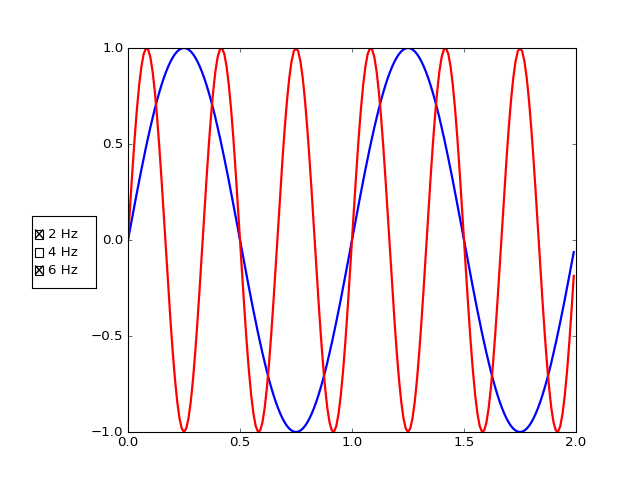